In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = [12, 5]

In [3]:
df = pd.read_csv('result.csv')

In [4]:
f = open('products','r')
urls = f.read().split('\n')
f.close()
urls = list(map(lambda x: x.replace('https://www.tiendainglesa.com.uy/',''), urls))
urls = list(map(lambda x: x.replace('.producto',''), urls))

products_dict = {}
for u in urls:
    parts = u.split('?')
    p_id = parts[1]
    p_name = parts[0]
    products_dict[p_id] = p_name

In [5]:
def product_name(products_dict, p_id):
    return products_dict[str(p_id)]
df['product_name'] = df.product_id.apply(lambda x: product_name(products_dict, x))

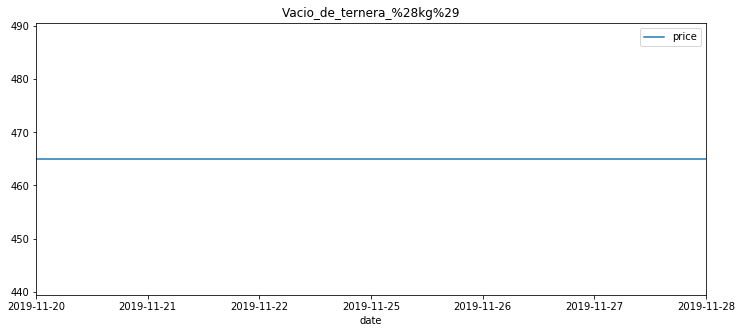

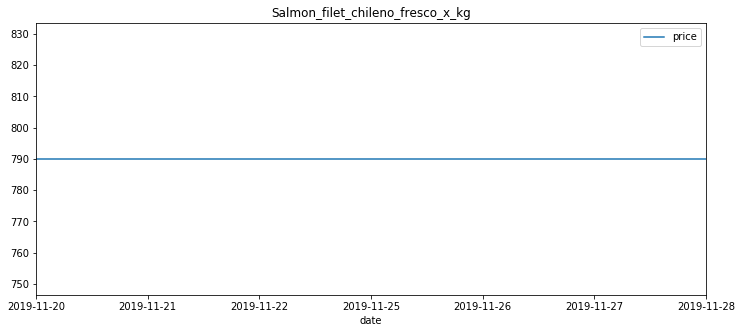

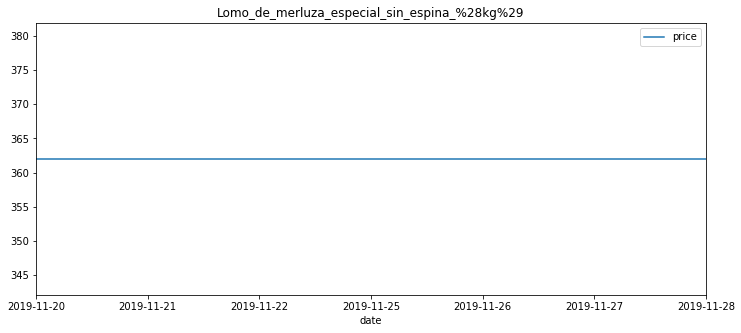

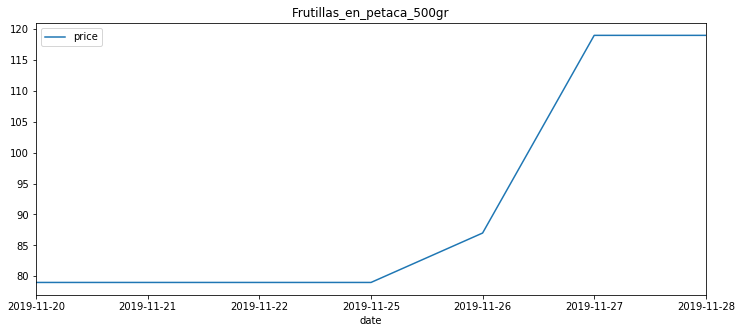

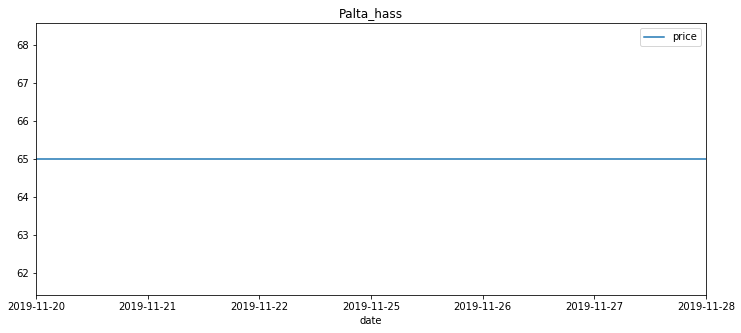

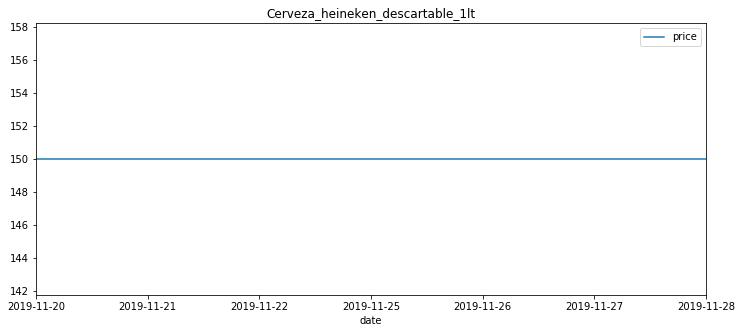

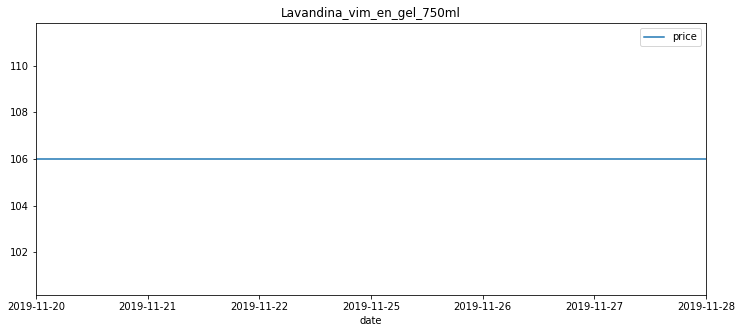

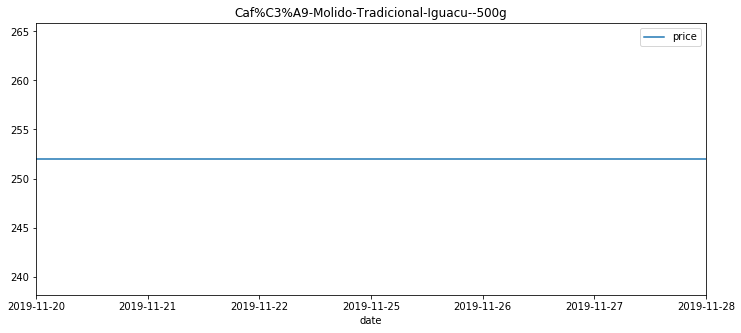

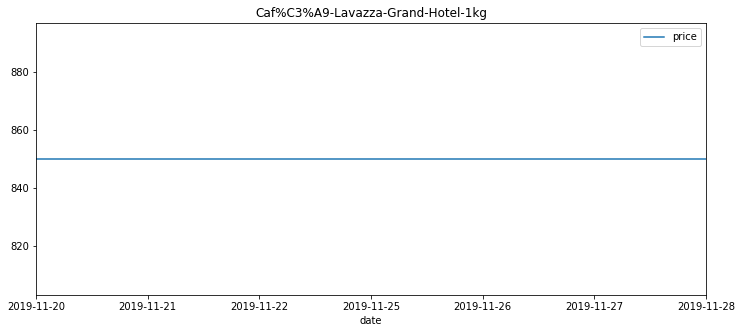

In [6]:
for k in products_dict.keys():
    df[df.product_id == int(k)].plot(x='date',y='price',title=products_dict[k])